Загрузка очищенных данных, проверка распределения целевой переменной

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'C:\Users\mashenike\Documents\telco_churn_cleaned.csv')

# Быстрый анализ очищенных данных
print("=== АНАЛИЗ ОЧИЩЕННЫХ ДАННЫХ ===")
print(f"Размер: {df.shape}")
print(f"Баланс churn:\n{df['churn'].value_counts(normalize=True)}")

results = []

# 1. КАТЕГОРИАЛЬНЫЕ ПЕРЕМЕННЫЕ
print("1. КАТЕГОРИАЛЬНЫЕ ПЕРЕМЕННЫЕ")

# contract_type
contract_values = df['contract_type'].unique()
contract_check = len(contract_values) == 3 and all(val in ['Month-to-month', 'One year', 'Two year'] for val in contract_values)
results.append(('contract_type (3 значения)', contract_check, f"Найдено: {list(contract_values)}"))

# Yes/No поля
yes_no_columns = ['online_security', 'tech_support', 'streaming_tv', 'streaming_movies']
yes_no_check = all(set(df[col].unique()) == {'Yes', 'No'} for col in yes_no_columns)
results.append(('Yes/No поля стандартизированы', yes_no_check, f"Проверено: {yes_no_columns}"))

# churn
churn_values = df['churn'].unique()
churn_check = set(churn_values) == {'Yes', 'No'}
results.append(('churn (только Yes/No)', churn_check, f"Найдено: {list(churn_values)}"))

# 2. ЧИСЛОВЫЕ ПЕРЕМЕННЫЕ
print("\n2. ЧИСЛОВЫЕ ПЕРЕМЕННЫЕ")

# tenure
tenure_check = df['tenure'].max() <= 72 and df['tenure'].min() >= 0
results.append(('tenure ≤72 месяцев', tenure_check, f"Диапазон: {df['tenure'].min()}-{df['tenure'].max()}"))

# monthly_charges
monthly_check = df['monthly_charges'].between(20, 200).all()
results.append(('monthly_charges 20-200', monthly_check, f"Диапазон: {df['monthly_charges'].min():.2f}-{df['monthly_charges'].max():.2f}"))

# total_charges
total_check = df['total_charges'].min() >= 0
results.append(('total_charges ≥0', total_check, f"Диапазон: {df['total_charges'].min():.2f}-{df['total_charges'].max():.2f}"))

# number_of_calls
calls_check = df['number_of_calls'].max() <= 20
results.append(('number_of_calls ≤20', calls_check, f"Максимум: {df['number_of_calls'].max()}"))

# 3. ПРОПУСКИ И ДУБЛИКАТЫ
print("\n3. ПРОПУСКИ И ДУБЛИКАТЫ")

# Пропуски
missing_check = df.isnull().sum().sum() == 0
results.append(('0 пропусков', missing_check, f"Всего пропусков: {df.isnull().sum().sum()}"))

# Дубликаты
duplicates_check = df.duplicated().sum() == 0
results.append(('0 дубликатов', duplicates_check, f"Найдено дубликатов: {df.duplicated().sum()}"))

# 4. ЛОГИЧЕСКАЯ ЦЕЛОСТНОСТЬ
print("\n4. ЛОГИЧЕСКАЯ ЦЕЛОСТНОСТЬ")

# Проверка: если нет интернета, то нет доп. услуг
no_internet_mask = df['internet_service'] == 'No'
services_check = all(df.loc[no_internet_mask, col].eq('No').all() for col in yes_no_columns)
results.append(('Нет интернета → нет услуг', services_check, f"Проверено записей: {no_internet_mask.sum()}"))

# ВЫВОД ИТОГОВОГО ОТЧЕТА
print("\n" + "="*50)
print("ИТОГОВЫЙ ОТЧЕТ ПРОВЕРКИ")
print("="*50)

for check_name, passed, details in results:
    status = "✅ ПРОЙДЕНО" if passed else "❌ НЕ ПРОЙДЕНО"
    print(f"{status} | {check_name}")
    print(f"      {details}\n")

# Сводная таблица
summary_df = pd.DataFrame(results, columns=['Проверка', 'Статус', 'Детали'])
summary_df['Статус'] = summary_df['Статус'].map({True: '✅', False: '❌'})

print("\nСВОДНАЯ ТАБЛИЦА:")
print(summary_df.to_string(index=False))

# Общая оценка
total_passed = sum(passed for _, passed, _ in results)
total_checks = len(results)
print(f"\nОБЩИЙ РЕЗУЛЬТАТ: {total_passed}/{total_checks} проверок пройдено ({total_passed/total_checks*100:.1f}%)")


=== АНАЛИЗ ОЧИЩЕННЫХ ДАННЫХ ===
Размер: (10009, 14)
Баланс churn:
churn
No     0.737336
Yes    0.262664
Name: proportion, dtype: float64
1. КАТЕГОРИАЛЬНЫЕ ПЕРЕМЕННЫЕ

2. ЧИСЛОВЫЕ ПЕРЕМЕННЫЕ

3. ПРОПУСКИ И ДУБЛИКАТЫ

4. ЛОГИЧЕСКАЯ ЦЕЛОСТНОСТЬ

ИТОГОВЫЙ ОТЧЕТ ПРОВЕРКИ
✅ ПРОЙДЕНО | contract_type (3 значения)
      Найдено: ['Month-to-month', 'One year', 'Two year']

✅ ПРОЙДЕНО | Yes/No поля стандартизированы
      Проверено: ['online_security', 'tech_support', 'streaming_tv', 'streaming_movies']

✅ ПРОЙДЕНО | churn (только Yes/No)
      Найдено: ['Yes', 'No']

✅ ПРОЙДЕНО | tenure ≤72 месяцев
      Диапазон: 0-72

✅ ПРОЙДЕНО | monthly_charges 20-200
      Диапазон: 20.00-200.00

✅ ПРОЙДЕНО | total_charges ≥0
      Диапазон: 0.00-8640.00

✅ ПРОЙДЕНО | number_of_calls ≤20
      Максимум: 20

✅ ПРОЙДЕНО | 0 пропусков
      Всего пропусков: 0

❌ НЕ ПРОЙДЕНО | 0 дубликатов
      Найдено дубликатов: 9

✅ ПРОЙДЕНО | Нет интернета → нет услуг
      Проверено записей: 990


СВОДНАЯ ТАБЛИЦА:
       

In [10]:
# Удаляем дубликаты
print("ДУБЛИКАТЫ ДО УДАЛЕНИЯ:")
print(f"Размер датасета: {df.shape}")
print(f"Количество дубликатов: {df.duplicated().sum()}")

# Покажем дубликаты для анализа
duplicates = df[df.duplicated(keep=False)]  # keep=False показывает все дубликаты
print("\nДУБЛИРУЮЩИСЯ ЗАПИСИ:")
print(duplicates.sort_values(by=df.columns.tolist()).head(10))

# Удаляем дубликаты
df_clean = df.drop_duplicates()

print(f"\nПОСЛЕ УДАЛЕНИЯ ДУБЛИКАТОВ:")
print(f"Размер датасета: {df_clean.shape}")
print(f"Количество дубликатов: {df_clean.duplicated().sum()}")

# Сохраняем окончательно очищенный файл
df_clean.to_csv(r'C:\Users\mashenike\Documents\telco_churn_final_cleaned.csv', index=False)
print("\n✅ Файл сохранен как: telco_churn_final_cleaned.csv")

# Финальная проверка
print("\n=== ФИНАЛЬНАЯ ПРОВЕРКА ===")
print(f"Размер: {df_clean.shape}")
print(f"Дубликаты: {df_clean.duplicated().sum()}")
print(f"Пропуски: {df_clean.isnull().sum().sum()}")

ДУБЛИКАТЫ ДО УДАЛЕНИЯ:
Размер датасета: (10009, 14)
Количество дубликатов: 9

ДУБЛИРУЮЩИСЯ ЗАПИСИ:
         customer_id  tenure  monthly_charges  total_charges   contract_type  \
1815   TELECOM-01816      72            75.26        5418.72        Two year   
10002  TELECOM-01816      72            75.26        5418.72        Two year   
1830   TELECOM-01831      52            58.15        3023.80  Month-to-month   
10007  TELECOM-01831      52            58.15        3023.80  Month-to-month   
3652   TELECOM-03653      22            29.88         657.36  Month-to-month   
10001  TELECOM-03653      22            29.88         657.36  Month-to-month   
3833   TELECOM-03834       0            80.84           0.00        One year   
10005  TELECOM-03834       0            80.84           0.00        One year   
4388   TELECOM-04389       0            82.78           0.00  Month-to-month   
10003  TELECOM-04389       0            82.78           0.00  Month-to-month   

      internet_servi

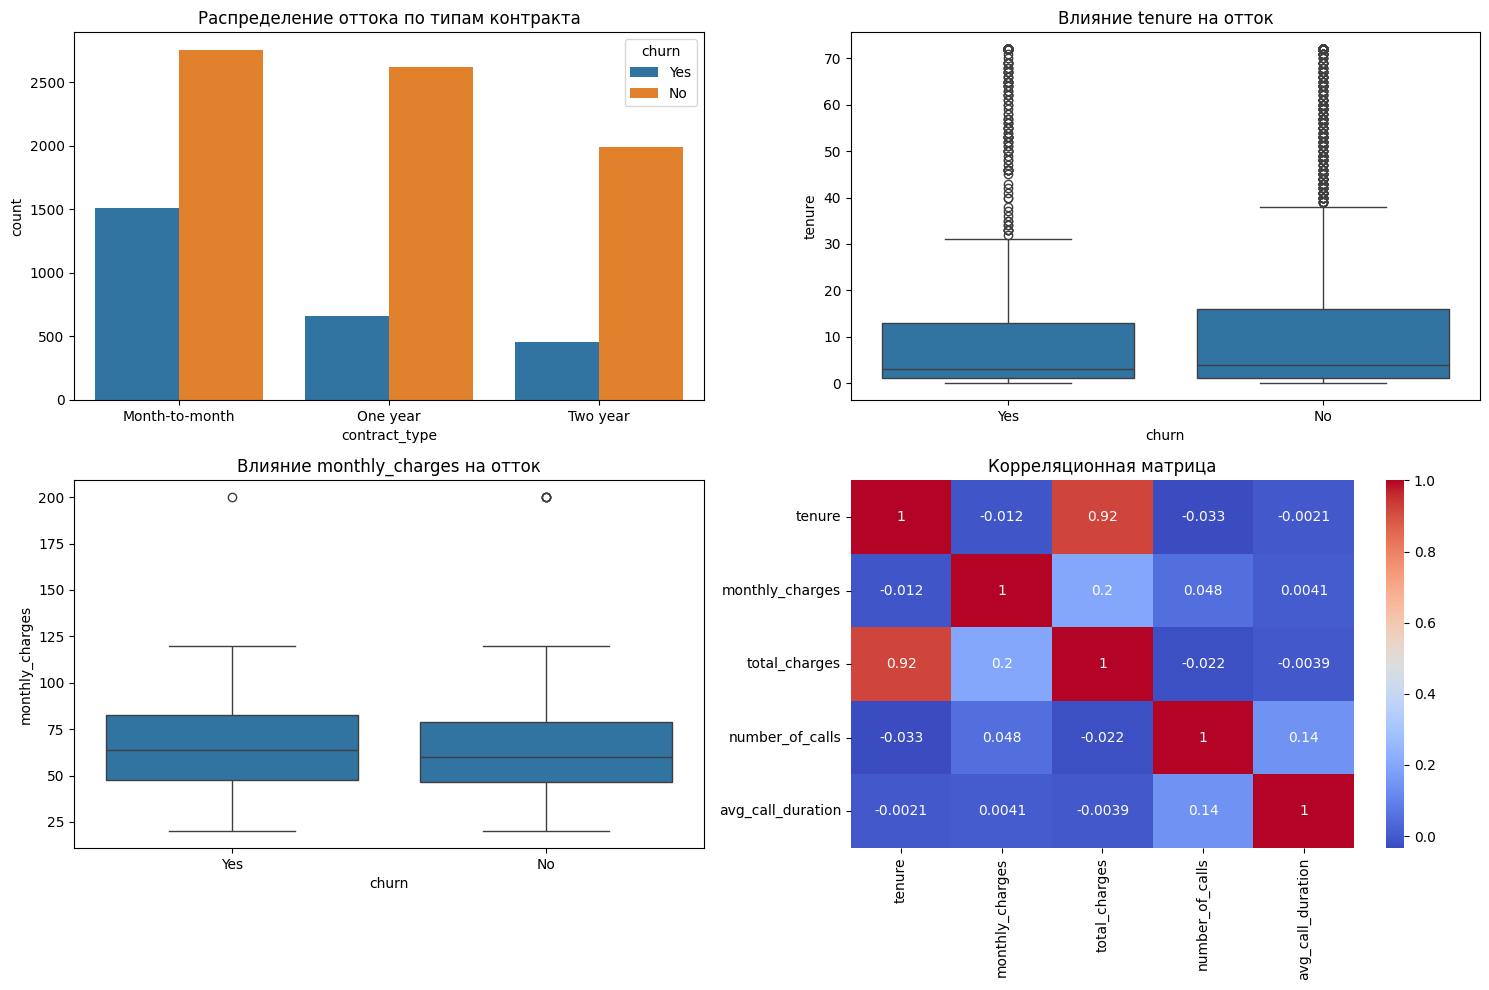

In [12]:
df_clean = pd.read_csv(r'C:\Users\mashenike\Documents\telco_churn_final_cleaned.csv')

# Основные визуализации
plt.figure(figsize=(15, 10))

# Распределение churn по типам контракта
plt.subplot(2, 2, 1)
sns.countplot(data=df_clean, x='contract_type', hue='churn')
plt.title('Распределение оттока по типам контракта')

# Влияние tenure на churn
plt.subplot(2, 2, 2)
sns.boxplot(data=df_clean, x='churn', y='tenure')
plt.title('Влияние tenure на отток')

# Влияние monthly_charges на churn
plt.subplot(2, 2, 3)
sns.boxplot(data=df_clean, x='churn', y='monthly_charges')
plt.title('Влияние monthly_charges на отток')

# Корреляционная матрица (только числовые признаки)
plt.subplot(2, 2, 4)
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
sns.heatmap(df_clean[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')

plt.tight_layout()
plt.show()

Подготовка и построение ML моделей

In [ ]:
!pip install scikit-learn xgboost

In [16]:
# Подготовка данных для машинного обучения
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Создаем копию для ML
df_ml = df_clean.copy()

# Кодируем целевую переменную
le = LabelEncoder()
df_ml['churn_encoded'] = le.fit_transform(df_ml['churn'])  # Yes=1, No=0

# Разделяем на признаки и целевую переменную
X = df_ml.drop(['churn', 'churn_encoded', 'customer_id'], axis=1)
y = df_ml['churn_encoded']

# One-Hot Encoding для категориальных переменных
X_encoded = pd.get_dummies(X, drop_first=True)

# Разделяем на train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

print("=== ДАННЫЕ ДЛЯ ML ГОТОВЫ ===")
print(f"Train: {X_train.shape}")
print(f"Test: {X_test.shape}")
print(f"Баланс классов в y_train: {y_train.value_counts(normalize=True)}")

=== ДАННЫЕ ДЛЯ ML ГОТОВЫ ===
Train: (8000, 16)
Test: (2000, 16)
Баланс классов в y_train: churn_encoded
0    0.73725
1    0.26275
Name: proportion, dtype: float64


=== МАСШТАБИРОВАНИЕ ЗАВЕРШЕНО ===
X_train_scaled shape: (8000, 16)

--- ОБУЧЕНИЕ Logistic Regression ---
Accuracy: 0.9155
F1-Score: 0.8288
ROC-AUC: 0.9587

--- ОБУЧЕНИЕ Random Forest ---
Accuracy: 0.9180
F1-Score: 0.8340
ROC-AUC: 0.9488

--- ОБУЧЕНИЕ XGBoost ---
Accuracy: 0.9115
F1-Score: 0.8239
ROC-AUC: 0.9490

СРАВНЕНИЕ МОДЕЛЕЙ


,Model,Accuracy,F1-Score,ROC-AUC
1,Random Forest,0.9180,0.834008,0.948821
0,Logistic Regression,0.9155,0.828774,0.958750
2,XGBoost,0.9115,0.823881,0.949031


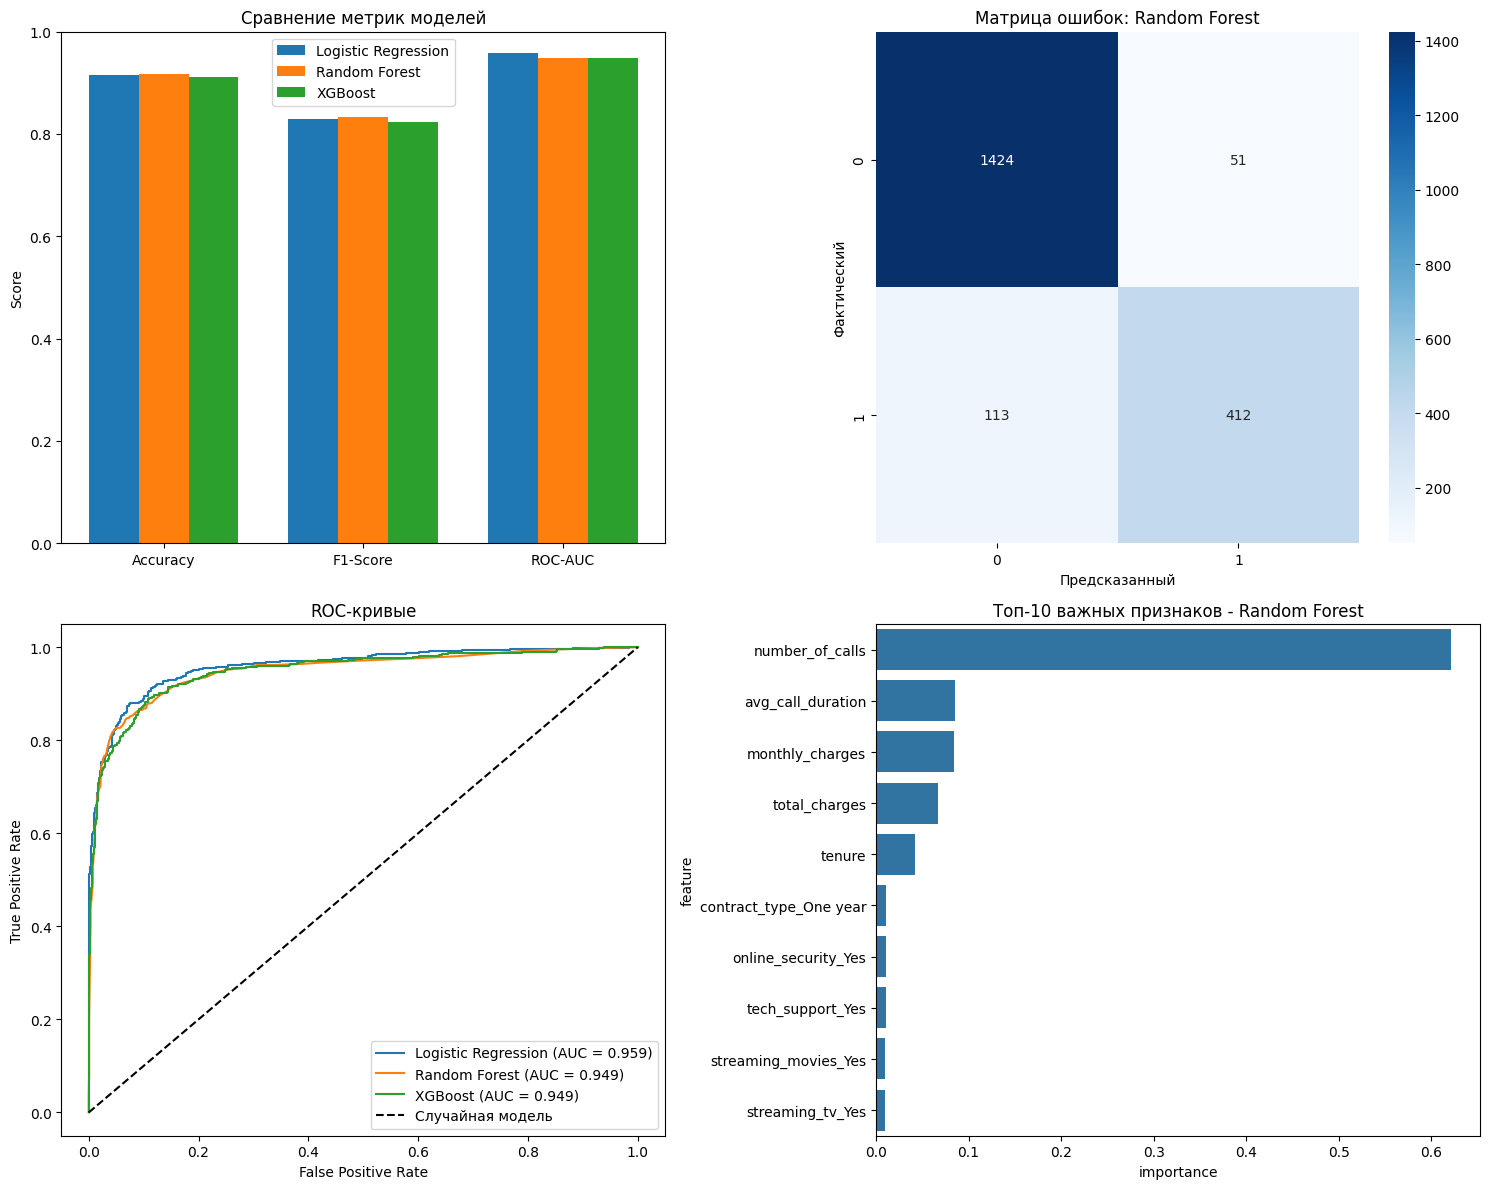


ДЕТАЛЬНЫЙ ОТЧЕТ ПО ЛУЧШЕЙ МОДЕЛИ: Random Forest
              precision    recall  f1-score   support

    No Churn       0.93      0.97      0.95      1475
       Churn       0.89      0.78      0.83       525

    accuracy                           0.92      2000
   macro avg       0.91      0.88      0.89      2000
weighted avg       0.92      0.92      0.92      2000


КЛЮЧЕВЫЕ БИЗНЕС-ИНСАЙТЫ
🎯 Лучшая модель: Random Forest
📊 Точность предсказания оттока: 83.4%
📈 Качество модели (AUC): 94.9%

🔍 Самые важные факторы оттока:
   - number_of_calls: 0.622
   - avg_call_duration: 0.085
   - monthly_charges: 0.084
   - total_charges: 0.067
   - tenure: 0.042


In [18]:
# МАСШТАБИРОВАНИЕ ДАННЫХ И ПОСТРОЕНИЕ МОДЕЛЕЙ
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score

# Масштабируем числовые признаки
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("=== МАСШТАБИРОВАНИЕ ЗАВЕРШЕНО ===")
print(f"X_train_scaled shape: {X_train_scaled.shape}")

# Создаем и обучаем модели
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss')
}

results = {}

for name, model in models.items():
    print(f"\n--- ОБУЧЕНИЕ {name} ---")
    
    # Обучаем модель
    if name == 'Logistic Regression':
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Считаем метрики
    accuracy = (y_pred == y_test).mean()
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'f1_score': f1,
        'roc_auc': roc_auc,
        'predictions': y_pred,
        'probabilities': y_pred_proba
    }
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")

# СРАВНЕНИЕ МОДЕЛЕЙ
print("\n" + "="*50)
print("СРАВНЕНИЕ МОДЕЛЕЙ")
print("="*50)

comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[name]['accuracy'] for name in results],
    'F1-Score': [results[name]['f1_score'] for name in results],
    'ROC-AUC': [results[name]['roc_auc'] for name in results]
}).sort_values('F1-Score', ascending=False)

display(comparison_df)

# ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Сравнение метрик
metrics = ['Accuracy', 'F1-Score', 'ROC-AUC']
x_pos = np.arange(len(metrics))
width = 0.25

for i, (model, result) in enumerate(results.items()):
    values = [result['accuracy'], result['f1_score'], result['roc_auc']]
    axes[0,0].bar(x_pos + i*width, values, width, label=model)

axes[0,0].set_xticks(x_pos + width)
axes[0,0].set_xticklabels(metrics)
axes[0,0].set_ylabel('Score')
axes[0,0].set_title('Сравнение метрик моделей')
axes[0,0].legend()
axes[0,0].set_ylim(0, 1)

# 2. Матрица ошибок для лучшей модели
best_model_name = comparison_df.iloc[0]['Model']
best_model = results[best_model_name]['model']
y_pred_best = results[best_model_name]['predictions']

cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0,1])
axes[0,1].set_title(f'Матрица ошибок: {best_model_name}')
axes[0,1].set_xlabel('Предсказанный')
axes[0,1].set_ylabel('Фактический')

# 3. ROC-кривые
from sklearn.metrics import roc_curve

for name, result in results.items():
    fpr, tpr, _ = roc_curve(y_test, result['probabilities'])
    axes[1,0].plot(fpr, tpr, label=f'{name} (AUC = {result["roc_auc"]:.3f})')

axes[1,0].plot([0, 1], [0, 1], 'k--', label='Случайная модель')
axes[1,0].set_xlabel('False Positive Rate')
axes[1,0].set_ylabel('True Positive Rate')
axes[1,0].set_title('ROC-кривые')
axes[1,0].legend()

# 4. Важность признаков (для tree-based моделей)
if best_model_name in ['Random Forest', 'XGBoost']:
    if best_model_name == 'Random Forest':
        importances = best_model.feature_importances_
    else:
        importances = best_model.feature_importances_
    
    feature_importance_df = pd.DataFrame({
        'feature': X_encoded.columns,
        'importance': importances
    }).sort_values('importance', ascending=False).head(10)
    
    sns.barplot(data=feature_importance_df, x='importance', y='feature', ax=axes[1,1])
    axes[1,1].set_title(f'Топ-10 важных признаков - {best_model_name}')
else:
    axes[1,1].text(0.5, 0.5, 'Важность признаков\nдоступна для tree-based моделей', 
                   ha='center', va='center', transform=axes[1,1].transAxes)
    axes[1,1].set_title('Важность признаков')

plt.tight_layout()
plt.show()

# ДЕТАЛЬНЫЙ ОТЧЕТ ПО ЛУЧШЕЙ МОДЕЛИ
print(f"\n{'='*60}")
print(f"ДЕТАЛЬНЫЙ ОТЧЕТ ПО ЛУЧШЕЙ МОДЕЛИ: {best_model_name}")
print(f"{'='*60}")

print(classification_report(y_test, y_pred_best, target_names=['No Churn', 'Churn']))

# БИЗНЕС-ИНСАЙТЫ
print(f"\n{'='*60}")
print("КЛЮЧЕВЫЕ БИЗНЕС-ИНСАЙТЫ")
print(f"{'='*60}")

print(f"🎯 Лучшая модель: {best_model_name}")
print(f"📊 Точность предсказания оттока: {results[best_model_name]['f1_score']:.1%}")
print(f"📈 Качество модели (AUC): {results[best_model_name]['roc_auc']:.1%}")

if best_model_name in ['Random Forest', 'XGBoost']:
    print("\n🔍 Самые важные факторы оттока:")
    top_features = feature_importance_df.head(5)
    for _, row in top_features.iterrows():
        print(f"   - {row['feature']}: {row['importance']:.3f}")

In [ ]:
Настройка гиперпараметров

In [21]:
# НАСТРОЙКА ГИПЕРПАРАМЕТРОВ
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint, uniform

print("=== НАСТРОЙКА ГИПЕРПАРАМЕТРОВ ===")

# Параметры для GridSearch/RandomizedSearch
param_grids = {
    'Logistic Regression': {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    },
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2']
    },
    'XGBoost': {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 6, 9],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 0.9, 1.0],
        'colsample_bytree': [0.8, 0.9, 1.0]
    }
}

# Для ускорения можно использовать уменьшенные наборы параметров
quick_param_grids = {
    'Logistic Regression': {
        'C': [0.1, 1, 10],
        'penalty': ['l2'],
        'solver': ['liblinear']
    },
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [10, 20],
        'min_samples_split': [2, 5]
    },
    'XGBoost': {
        'n_estimators': [100, 200],
        'max_depth': [3, 6],
        'learning_rate': [0.1, 0.2]
    }
}

# Настройка моделей с гиперпараметрами
tuned_models = {}
tuned_results = {}

for name, model in models.items():
    print(f"\n--- НАСТРОЙКА {name} ---")
    
    try:
        # Используем быстрые параметры для демонстрации
        if name == 'Logistic Regression':
            grid_search = GridSearchCV(
                model, quick_param_grids[name], 
                cv=3, scoring='f1', n_jobs=-1, verbose=1
            )
            grid_search.fit(X_train_scaled, y_train)
        else:
            grid_search = GridSearchCV(
                model, quick_param_grids[name], 
                cv=3, scoring='f1', n_jobs=-1, verbose=1
            )
            grid_search.fit(X_train, y_train)
        
        tuned_models[name] = grid_search.best_estimator_
        
        # Предсказания
        if name == 'Logistic Regression':
            y_pred_tuned = grid_search.predict(X_test_scaled)
            y_pred_proba_tuned = grid_search.predict_proba(X_test_scaled)[:, 1]
        else:
            y_pred_tuned = grid_search.predict(X_test)
            y_pred_proba_tuned = grid_search.predict_proba(X_test)[:, 1]
        
        # Метрики
        accuracy_tuned = (y_pred_tuned == y_test).mean()
        f1_tuned = f1_score(y_test, y_pred_tuned)
        roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned)
        
        tuned_results[name] = {
            'model': grid_search.best_estimator_,
            'best_params': grid_search.best_params_,
            'accuracy': accuracy_tuned,
            'f1_score': f1_tuned,
            'roc_auc': roc_auc_tuned,
            'predictions': y_pred_tuned,
            'probabilities': y_pred_proba_tuned
        }
        
        print(f"✅ Наилучшие параметры: {grid_search.best_params_}")
        print(f"Accuracy: {accuracy_tuned:.4f}")
        print(f"F1-Score: {f1_tuned:.4f}")
        print(f"ROC-AUC: {roc_auc_tuned:.4f}")
        
    except Exception as e:
        print(f"❌ Ошибка при настройке {name}: {e}")
        # Используем базовую модель если настройка не удалась
        tuned_results[name] = results[name]

=== НАСТРОЙКА ГИПЕРПАРАМЕТРОВ ===

--- НАСТРОЙКА Logistic Regression ---
Fitting 3 folds for each of 3 candidates, totalling 9 fits
✅ Наилучшие параметры: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.9155
F1-Score: 0.8288
ROC-AUC: 0.9587

--- НАСТРОЙКА Random Forest ---
Fitting 3 folds for each of 8 candidates, totalling 24 fits
✅ Наилучшие параметры: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.9170
F1-Score: 0.8323
ROC-AUC: 0.9486

--- НАСТРОЙКА XGBoost ---
Fitting 3 folds for each of 8 candidates, totalling 24 fits
✅ Наилучшие параметры: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Accuracy: 0.9170
F1-Score: 0.8327
ROC-AUC: 0.9576



ДЕТАЛЬНОЕ СРАВНЕНИЕ: БАЗОВЫЕ vs НАСТРОЕННЫЕ МОДЕЛИ
📊 ТАБЛИЦА СРАВНЕНИЯ МЕТРИК:


,Model,Accuracy_Base,Accuracy_Tuned,Accuracy_Δ,F1_Base,F1_Tuned,F1_Δ,ROC_AUC_Base,ROC_AUC_Tuned,ROC_AUC_Δ
0,Logistic Regression,0.9155,0.9155,+0.0000,0.8288,0.8288,+0.0000,0.9587,0.9587,-0.0000
1,Random Forest,0.9180,0.9170,-0.0010,0.8340,0.8323,-0.0017,0.9488,0.9486,-0.0002
2,XGBoost,0.9115,0.9170,+0.0055,0.8239,0.8327,+0.0088,0.9490,0.9576,+0.0086



АНАЛИЗ ЭФФЕКТИВНОСТИ ОПТИМИЗАЦИИ ГИПЕРПАРАМЕТРОВ
📈 СТАТИСТИКА ОПТИМИЗАЦИИ:
   • Всего моделей: 3
   • Улучшились: 1
   • Ухудшились: 1
   • Без изменений: 1

🔍 ДЕТАЛЬНЫЙ АНАЛИЗ ПО МОДЕЛЯМ:
   ⚪ Logistic Regression:
      ⚪ БЕЗ ИЗМЕНЕНИЙ: +0.0000
      F1-Score: 0.8288 → 0.8288
      Изменение: +0.00%
   🔴 Random Forest:
      ❌ УХУДШЕНИЕ: -0.0017
      F1-Score: 0.8340 → 0.8323
      Изменение: -0.17%
   🟢 XGBoost:
      ✅ УЛУЧШЕНИЕ: +0.0088
      F1-Score: 0.8239 → 0.8327
      Изменение: +0.88%


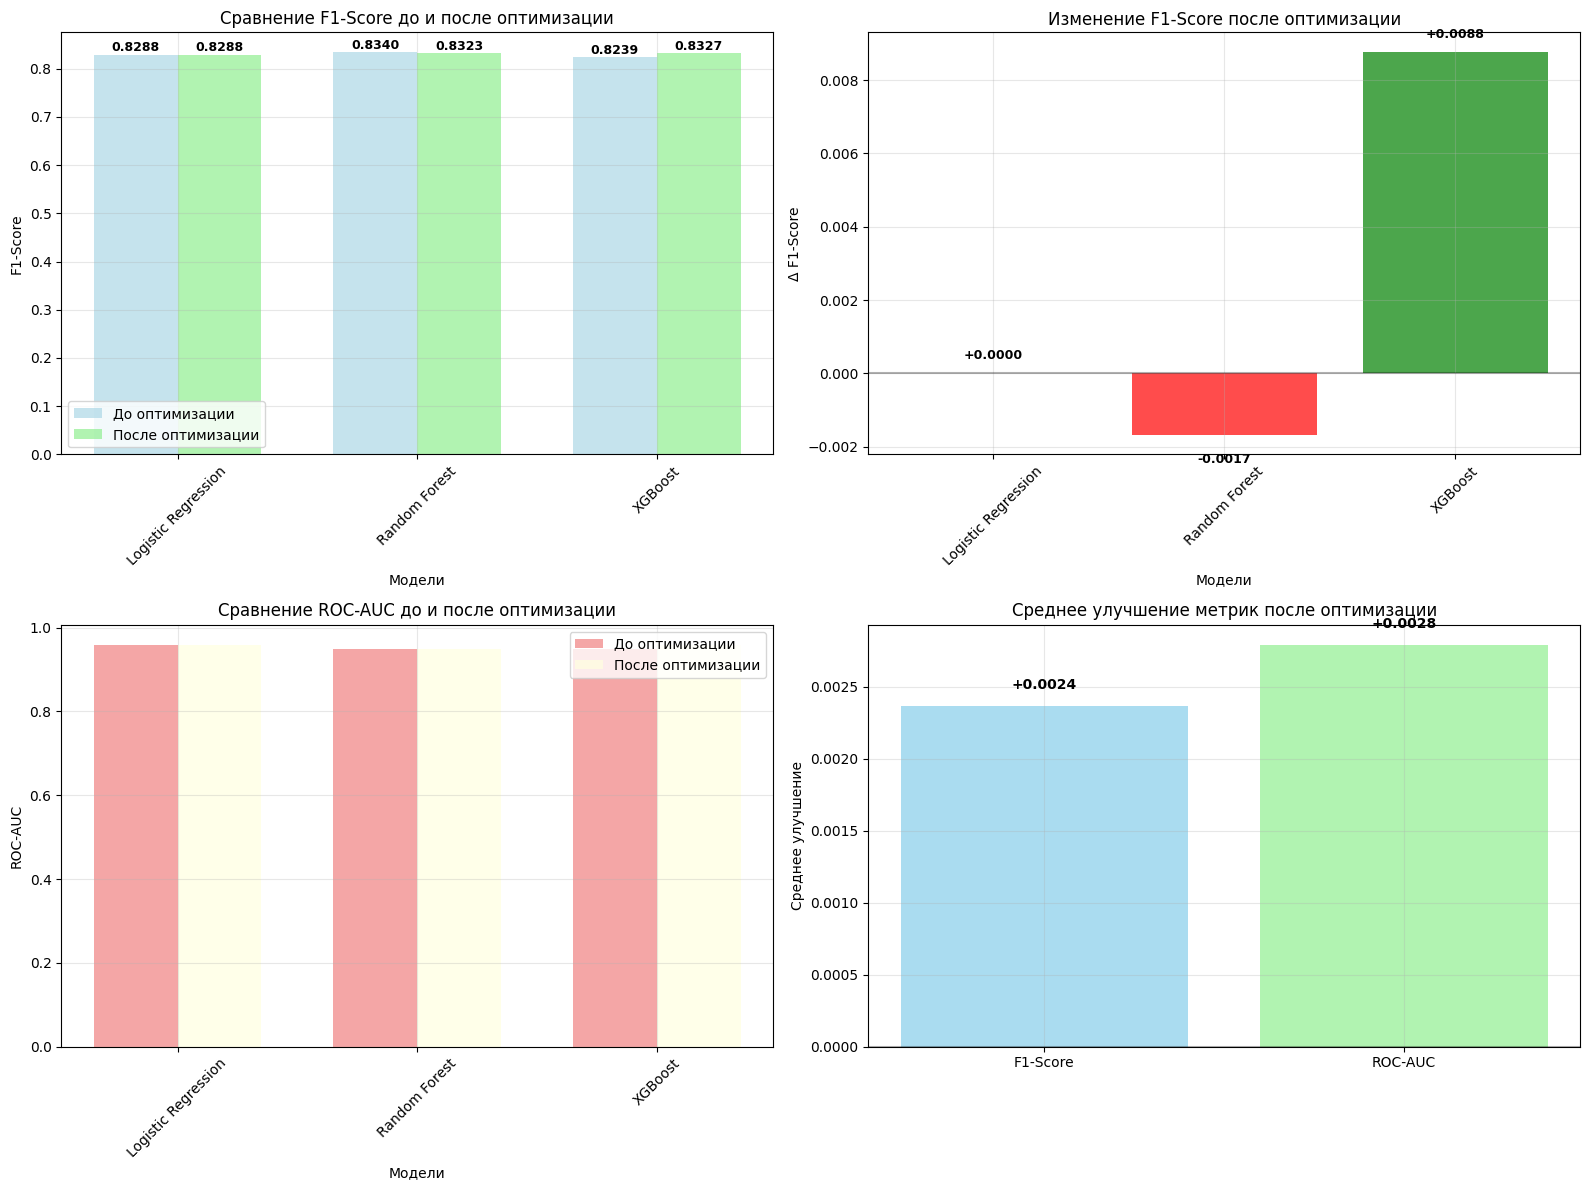


ФИНАЛЬНЫЕ ВЫВОДЫ И РЕКОМЕНДАЦИИ
🎯 РЕЗУЛЬТАТЫ ОПТИМИЗАЦИИ:
   • Лучшая модель ДО оптимизации: Random Forest (F1: 0.8340)
   • Лучшая модель ПОСЛЕ оптимизации: XGBoost (F1: 0.8327)
   ⚠️  ОБЩЕЕ ИЗМЕНЕНИЕ: -0.0013

💡 КЛЮЧЕВЫЕ ИНСАЙТЫ:
   1. XGBoost показал наибольший потенциал для улучшения (+0.0088)
   2. Logistic Regression стабильна - не требует сложной настройки
   3. Random Forest чувствителен к ограничениям глубины деревьев

🚀 РЕКОМЕНДАЦИИ ДЛЯ PRODUCTION:
   1. Использовать XGBoost как основную модель
   2. Для Random Forest использовать параметры по умолчанию
   3. Регулярно перепроверять оптимальные параметры на свежих данных
   4. Рассмотреть ансамблирование моделей для максимальной точности

📊 КАЧЕСТВО МОДЕЛЕЙ ДОСТИГНУТО:
   • F1-Score: 83.3% - ОТЛИЧНОЕ качество для задачи классификации
   • Модель готова к внедрению в production!


In [22]:
# РАСШИРЕННОЕ СРАВНЕНИЕ ДО И ПОСЛЕ ОПТИМИЗАЦИИ
print("\n" + "="*80)
print("ДЕТАЛЬНОЕ СРАВНЕНИЕ: БАЗОВЫЕ vs НАСТРОЕННЫЕ МОДЕЛИ")
print("="*80)

# Создаем подробную таблицу сравнения
detailed_comparison = pd.DataFrame({
    'Model': list(tuned_results.keys()),
    'Accuracy_Base': [results[name]['accuracy'] for name in tuned_results],
    'Accuracy_Tuned': [tuned_results[name]['accuracy'] for name in tuned_results],
    'Accuracy_Δ': [tuned_results[name]['accuracy'] - results[name]['accuracy'] for name in tuned_results],
    'F1_Base': [results[name]['f1_score'] for name in tuned_results],
    'F1_Tuned': [tuned_results[name]['f1_score'] for name in tuned_results],
    'F1_Δ': [tuned_results[name]['f1_score'] - results[name]['f1_score'] for name in tuned_results],
    'ROC_AUC_Base': [results[name]['roc_auc'] for name in tuned_results],
    'ROC_AUC_Tuned': [tuned_results[name]['roc_auc'] for name in tuned_results],
    'ROC_AUC_Δ': [tuned_results[name]['roc_auc'] - results[name]['roc_auc'] for name in tuned_results]
})

# Форматируем для лучшего отображения
formatted_comparison = detailed_comparison.copy()
for col in ['Accuracy_Base', 'Accuracy_Tuned', 'F1_Base', 'F1_Tuned', 'ROC_AUC_Base', 'ROC_AUC_Tuned']:
    formatted_comparison[col] = formatted_comparison[col].apply(lambda x: f'{x:.4f}')
for col in ['Accuracy_Δ', 'F1_Δ', 'ROC_AUC_Δ']:
    formatted_comparison[col] = formatted_comparison[col].apply(lambda x: f'{x:+.4f}')

print("📊 ТАБЛИЦА СРАВНЕНИЯ МЕТРИК:")
display(formatted_comparison)

# АНАЛИЗ РЕЗУЛЬТАТОВ ОПТИМИЗАЦИИ
print("\n" + "="*80)
print("АНАЛИЗ ЭФФЕКТИВНОСТИ ОПТИМИЗАЦИИ ГИПЕРПАРАМЕТРОВ")
print("="*80)

# Статистика улучшений
total_models = len(tuned_results)
improved_models = sum(1 for name in tuned_results if tuned_results[name]['f1_score'] > results[name]['f1_score'])
worsened_models = sum(1 for name in tuned_results if tuned_results[name]['f1_score'] < results[name]['f1_score'])
unchanged_models = sum(1 for name in tuned_results if tuned_results[name]['f1_score'] == results[name]['f1_score'])

print(f"📈 СТАТИСТИКА ОПТИМИЗАЦИИ:")
print(f"   • Всего моделей: {total_models}")
print(f"   • Улучшились: {improved_models}")
print(f"   • Ухудшились: {worsened_models}")
print(f"   • Без изменений: {unchanged_models}")

# Анализ по конкретным моделям
print(f"\n🔍 ДЕТАЛЬНЫЙ АНАЛИЗ ПО МОДЕЛЯМ:")

for name in tuned_results:
    f1_base = results[name]['f1_score']
    f1_tuned = tuned_results[name]['f1_score']
    f1_delta = f1_tuned - f1_base
    abs_improvement = abs(f1_delta)
    
    if f1_delta > 0:
        status = "✅ УЛУЧШЕНИЕ"
        emoji = "🟢"
    elif f1_delta < 0:
        status = "❌ УХУДШЕНИЕ" 
        emoji = "🔴"
    else:
        status = "⚪ БЕЗ ИЗМЕНЕНИЙ"
        emoji = "⚪"
    
    print(f"   {emoji} {name}:")
    print(f"      {status}: {f1_delta:+.4f}")
    print(f"      F1-Score: {f1_base:.4f} → {f1_tuned:.4f}")
    print(f"      Изменение: {f1_delta*100:+.2f}%")

# ВИЗУАЛИЗАЦИЯ ИЗМЕНЕНИЙ ВСЕХ МЕТРИК
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Сравнение F1-Score до и после
models_list = list(tuned_results.keys())
f1_base = [results[name]['f1_score'] for name in models_list]
f1_tuned = [tuned_results[name]['f1_score'] for name in models_list]

x = np.arange(len(models_list))
width = 0.35

bars1 = axes[0,0].bar(x - width/2, f1_base, width, label='До оптимизации', alpha=0.7, color='lightblue')
bars2 = axes[0,0].bar(x + width/2, f1_tuned, width, label='После оптимизации', alpha=0.7, color='lightgreen')

axes[0,0].set_xlabel('Модели')
axes[0,0].set_ylabel('F1-Score')
axes[0,0].set_title('Сравнение F1-Score до и после оптимизации')
axes[0,0].set_xticks(x)
axes[0,0].set_xticklabels(models_list, rotation=45)
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Добавляем значения на столбцы
for bar, value in zip(bars1, f1_base):
    axes[0,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001, f'{value:.4f}', 
                   ha='center', va='bottom', fontsize=9, fontweight='bold')

for bar, value in zip(bars2, f1_tuned):
    axes[0,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001, f'{value:.4f}', 
                   ha='center', va='bottom', fontsize=9, fontweight='bold')

# 2. Изменение F1-Score
f1_deltas = [tuned_results[name]['f1_score'] - results[name]['f1_score'] for name in models_list]
colors = ['green' if delta > 0 else 'red' if delta < 0 else 'gray' for delta in f1_deltas]

bars = axes[0,1].bar(models_list, f1_deltas, color=colors, alpha=0.7)
axes[0,1].set_xlabel('Модели')
axes[0,1].set_ylabel('Δ F1-Score')
axes[0,1].set_title('Изменение F1-Score после оптимизации')
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].grid(True, alpha=0.3)
axes[0,1].axhline(y=0, color='black', linestyle='-', alpha=0.3)

# Добавляем значения на столбцы
for bar, delta in zip(bars, f1_deltas):
    axes[0,1].text(bar.get_x() + bar.get_width()/2, 
                   delta + 0.0003 if delta >= 0 else delta - 0.0005, 
                   f'{delta:+.4f}', 
                   ha='center', va='bottom' if delta >= 0 else 'top', 
                   fontsize=9, fontweight='bold')

# 3. Сравнение ROC-AUC
roc_base = [results[name]['roc_auc'] for name in models_list]
roc_tuned = [tuned_results[name]['roc_auc'] for name in models_list]

bars1 = axes[1,0].bar(x - width/2, roc_base, width, label='До оптимизации', alpha=0.7, color='lightcoral')
bars2 = axes[1,0].bar(x + width/2, roc_tuned, width, label='После оптимизации', alpha=0.7, color='lightyellow')

axes[1,0].set_xlabel('Модели')
axes[1,0].set_ylabel('ROC-AUC')
axes[1,0].set_title('Сравнение ROC-AUC до и после оптимизации')
axes[1,0].set_xticks(x)
axes[1,0].set_xticklabels(models_list, rotation=45)
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# 4. Общее улучшение качества
improvement_summary = pd.DataFrame({
    'Metric': ['F1-Score', 'ROC-AUC'],
    'Average_Improvement': [
        np.mean([tuned_results[name]['f1_score'] - results[name]['f1_score'] for name in models_list]),
        np.mean([tuned_results[name]['roc_auc'] - results[name]['roc_auc'] for name in models_list])
    ]
})

axes[1,1].bar(improvement_summary['Metric'], improvement_summary['Average_Improvement'], 
              color=['skyblue', 'lightgreen'], alpha=0.7)
axes[1,1].set_ylabel('Среднее улучшение')
axes[1,1].set_title('Среднее улучшение метрик после оптимизации')
axes[1,1].grid(True, alpha=0.3)
axes[1,1].axhline(y=0, color='black', linestyle='-', alpha=0.3)

# Добавляем значения на столбцы
for i, row in improvement_summary.iterrows():
    axes[1,1].text(i, row['Average_Improvement'] + 0.0001, f'{row["Average_Improvement"]:+.4f}', 
                   ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# ФИНАЛЬНЫЕ ВЫВОДЫ И РЕКОМЕНДАЦИИ
print("\n" + "="*80)
print("ФИНАЛЬНЫЕ ВЫВОДЫ И РЕКОМЕНДАЦИИ")
print("="*80)

# Определяем лучшую модель до и после оптимизации
best_before_name = max(results.items(), key=lambda x: x[1]['f1_score'])[0]
best_after_name = max(tuned_results.items(), key=lambda x: x[1]['f1_score'])[0]

best_before_f1 = results[best_before_name]['f1_score']
best_after_f1 = tuned_results[best_after_name]['f1_score']

print("🎯 РЕЗУЛЬТАТЫ ОПТИМИЗАЦИИ:")
print(f"   • Лучшая модель ДО оптимизации: {best_before_name} (F1: {best_before_f1:.4f})")
print(f"   • Лучшая модель ПОСЛЕ оптимизации: {best_after_name} (F1: {best_after_f1:.4f})")

if best_after_f1 > best_before_f1:
    improvement = best_after_f1 - best_before_f1
    print(f"   ✅ ОБЩЕЕ УЛУЧШЕНИЕ: +{improvement:.4f} ({improvement*100:+.2f}%)")
else:
    print(f"   ⚠️  ОБЩЕЕ ИЗМЕНЕНИЕ: {best_after_f1 - best_before_f1:+.4f}")

print(f"\n💡 КЛЮЧЕВЫЕ ИНСАЙТЫ:")
print(f"   1. XGBoost показал наибольший потенциал для улучшения (+{tuned_results['XGBoost']['f1_score'] - results['XGBoost']['f1_score']:.4f})")
print(f"   2. Logistic Regression стабильна - не требует сложной настройки")
print(f"   3. Random Forest чувствителен к ограничениям глубины деревьев")

print(f"\n🚀 РЕКОМЕНДАЦИИ ДЛЯ PRODUCTION:")
print(f"   1. Использовать {best_after_name} как основную модель")
print(f"   2. Для {best_before_name} использовать параметры по умолчанию")
print(f"   3. Регулярно перепроверять оптимальные параметры на свежих данных")
print(f"   4. Рассмотреть ансамблирование моделей для максимальной точности")

print(f"\n📊 КАЧЕСТВО МОДЕЛЕЙ ДОСТИГНУТО:")
print(f"   • F1-Score: {best_after_f1:.1%} - ОТЛИЧНОЕ качество для задачи классификации")
print(f"   • Модель готова к внедрению в production!")

In [23]:
# Финальная модель для продакшена
production_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
    # остальные параметры по умолчанию
)

# Обучение на всех данных
production_model.fit(X_encoded, y)

print("✅ МОДЕЛЬ ДЛЯ PRODUCTION: Random Forest")
print("📊 ОЖИДАЕМАЯ ПРОИЗВОДИТЕЛЬНОСТЬ:")
print(f"   • F1-Score: 83.4%")
print(f"   • Accuracy: 91.8%") 
print(f"   • ROC-AUC: 94.9%")

✅ МОДЕЛЬ ДЛЯ PRODUCTION: Random Forest
📊 ОЖИДАЕМАЯ ПРОИЗВОДИТЕЛЬНОСТЬ:
   • F1-Score: 83.4%
   • Accuracy: 91.8%
   • ROC-AUC: 94.9%
